In [32]:
#importing the libraries and the train and test files

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import GridSearchCV
       

In [28]:
train = pd.read_csv('D:\\Hackathons\\Signzy-job\\labeledTrainData.tsv', delimiter="\t")
test = pd.read_csv('D:\\Hackathons\\Signzy-job\\testData.tsv', delimiter="\t")

In [29]:
#shape of train and test files
print(train.shape)
print(test.shape)

(25000, 3)
(25000, 2)


In [30]:
#looking for null values
train.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

### Text preprocessing

In [4]:
# preprocessing train data
corpus = []
for i in range(0,25000):
    review = re.sub('[^a-zA-Z]', ' ', train['review'].values[i])  #keeping only alphabets
    review = review.lower()  #lowering
    review = review.split()
    lemma = WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))] #removing stopwords
    review = ' '.join(review)
    corpus.append(review)
    
    
#joining the cleaned reviews to the main train file and saving it as a csv file
train['cleaned_review'] = corpus
train.to_csv("cleaned_train.csv", index=False)

In [5]:
# preprocessing test data
corpus_test = []
for i in range(0,25000):
    review = re.sub('[^a-zA-Z]', ' ', test['review'].values[i])
    review = review.lower()
    review = review.split()
    lemma = WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_test.append(review)

    
#joining the cleaned reviews to the main test file and saving it as a csv file
test['cleaned_review'] = corpus_test
test.to_csv("cleaned_test.csv", index=False)

In [31]:
#importing csv files
train = pd.read_csv("cleaned_train.csv")
test = pd.read_csv("cleaned_test.csv")

In [5]:
X = train['cleaned_review']
y = train['sentiment']

In [6]:

train_X,test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=0) #splitting into 70:30

### Bag of words models

In [7]:
bag_of_words_vectorizer = CountVectorizer(analyzer = "word",
                                          tokenizer = None,    
                                          preprocessor = None,
                                          ngram_range = (1, 1),
                                          binary = False,
                                          strip_accents='unicode')

#### Model 1: MultinomialNB

In [8]:
from sklearn.naive_bayes import MultinomialNB

bow_mnb = bag_of_words_vectorizer.fit_transform(train_X)
bow_mnb_test = bag_of_words_vectorizer.transform(test_X)

bow_mnb_classifier = MultinomialNB()
bow_mnb_classifier.fit(bow_mnb, train_y)
bow_mnb_prediction = bow_mnb_classifier.predict(bow_mnb_test)

print(confusion_matrix(test_y,bow_mnb_prediction))
print("")
print(classification_report(test_y,bow_mnb_prediction))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_mnb_prediction, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_mnb_prediction, average=None))))

[[3334  455]
 [ 551 3160]]

             precision    recall  f1-score   support

          0       0.86      0.88      0.87      3789
          1       0.87      0.85      0.86      3711

avg / total       0.87      0.87      0.87      7500


Precision variance: 0.000064
Recall variance: 0.000202


#### Model 2: BernoulliNB

In [9]:
from sklearn.naive_bayes import BernoulliNB

bow_bnb = bag_of_words_vectorizer.fit_transform(train_X)
bow_bnb_test = bag_of_words_vectorizer.transform(test_X)


bow_bnb_classifier = BernoulliNB()
bow_bnb_classifier.fit(bow_bnb, train_y)
bow_bnb_prediction = bow_bnb_classifier.predict(bow_bnb_test)

print(confusion_matrix(test_y,bow_bnb_prediction))
print(classification_report(test_y,bow_bnb_prediction))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_bnb_prediction, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_bnb_prediction, average=None))))

[[3376  413]
 [ 680 3031]]
             precision    recall  f1-score   support

          0       0.83      0.89      0.86      3789
          1       0.88      0.82      0.85      3711

avg / total       0.86      0.85      0.85      7500


Precision variance: 0.000570
Recall variance: 0.001378


#### Model 3: LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
bow_lr = bag_of_words_vectorizer.fit_transform(train_X)
bow_lr_test = bag_of_words_vectorizer.transform(test_X)
lr.fit(bow_lr, train_y)
bow_lr_pred = lr.predict(bow_lr_test)

print(confusion_matrix(test_y,bow_lr_pred))
print(classification_report(test_y,bow_lr_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_lr_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_lr_pred, average=None))))

[[3294  495]
 [ 438 3273]]
             precision    recall  f1-score   support

          0       0.88      0.87      0.88      3789
          1       0.87      0.88      0.88      3711

avg / total       0.88      0.88      0.88      7500


Precision variance: 0.000049
Recall variance: 0.000040


#### Model 4: RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
bow_rf = bag_of_words_vectorizer.fit_transform(train_X)
bow_rf_test = bag_of_words_vectorizer.transform(test_X)
rf.fit(bow_rf, train_y)
bow_rf_pred = rf.predict(bow_rf_test)

print(confusion_matrix(test_y,bow_rf_pred))
print(classification_report(test_y,bow_rf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_rf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_rf_pred, average=None))))

[[3236  553]
 [ 524 3187]]
             precision    recall  f1-score   support

          0       0.86      0.85      0.86      3789
          1       0.85      0.86      0.86      3711

avg / total       0.86      0.86      0.86      7500


Precision variance: 0.000018
Recall variance: 0.000006


#### Model 5: GradientBoosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
bow_gbc = bag_of_words_vectorizer.fit_transform(train_X)
bow_gbc_test = bag_of_words_vectorizer.transform(test_X)
gbc.fit(bow_gbc, train_y)
bow_gbc_pred = gbc.predict(bow_gbc_test)

print(confusion_matrix(test_y,bow_gbc_pred))
print(classification_report(test_y,bow_gbc_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_gbc_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_gbc_pred, average=None))))

[[2887  902]
 [ 494 3217]]
             precision    recall  f1-score   support

          0       0.85      0.76      0.81      3789
          1       0.78      0.87      0.82      3711

avg / total       0.82      0.81      0.81      7500


Precision variance: 0.001328
Recall variance: 0.002753


#### Model 6: XGBoost

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
bow_xgb = bag_of_words_vectorizer.fit_transform(train_X)
bow_xgb_test = bag_of_words_vectorizer.transform(test_X)
xgb.fit(bow_xgb, train_y)
bow_xgb_pred = gbc.predict(bow_xgb_test)

print(confusion_matrix(test_y,bow_xgb_pred))
print(classification_report(test_y,bow_xgb_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, bow_xgb_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, bow_xgb_pred, average=None))))

[[2887  902]
 [ 494 3217]]
             precision    recall  f1-score   support

          0       0.85      0.76      0.81      3789
          1       0.78      0.87      0.82      3711

avg / total       0.82      0.81      0.81      7500


Precision variance: 0.001328
Recall variance: 0.002753


#### Selecting best model to go forward: Logistic Regression [Kaggle Public LB Score: 85.536]

In [26]:
pred = lr.predict(test_text_bow)
predicted = pd.DataFrame()
predicted['id'] = test['id']
predicted['sentiment'] = pred
predicted.to_csv("lr.csv", index=False)

### Tf-Idf Vectorizer and setting maximum features to be used at 10,000 features

In [12]:
tfidf_vectorizer = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (1,1),
                                           strip_accents = 'unicode',
                                           max_features = 10000)

In [37]:
lr_tfidf = LogisticRegression()
lr_tfidf_train1 = tfidf_vectorizer.fit_transform(train_X)
lr_tfidf_test1 = tfidf_vectorizer.transform(test_X)

tfidf_transformer = TfidfTransformer()
data_tfidf_lr = tfidf_transformer.fit_transform(lr_tfidf_train1)
data_tfidf_test_lr = tfidf_transformer.transform(lr_tfidf_test1)

lr_tfidf.fit(data_tfidf_lr, train_y)
lr_tfidf_pred1 = lr_tfidf.predict(data_tfidf_test_lr)

print(confusion_matrix(test_y,lr_tfidf_pred1))
print(classification_report(test_y,lr_tfidf_pred1))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, lr_tfidf_pred1, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, lr_tfidf_pred1, average=None))))

[[3333  456]
 [ 372 3339]]
             precision    recall  f1-score   support

          0       0.90      0.88      0.89      3789
          1       0.88      0.90      0.89      3711

avg / total       0.89      0.89      0.89      7500


Precision variance: 0.000098
Recall variance: 0.000101


In [40]:
test_text_bow_10000feat = tfidf_vectorizer.transform(test_text)
test_text_bow_10000feat = tfidf_transformer.transform(test_text_bow_10000feat)
pred = lr_tfidf.predict(test_text_bow_10000feat)
predicted = pd.DataFrame()
predicted['id'] = test['id']
predicted['sentiment'] = pred
predicted.to_csv("lr_10000feat.csv", index=False)

#### Kaggle Public LB Score: 87.724

### N-Gram Analysis

#### Bi-Gram (2,2) Analysis

In [41]:
ngram_bi = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (2,2),
                                           strip_accents = 'unicode',
                                           max_features = 10000)



ngram_bi_train = ngram_bi.fit_transform(train_X)
ngram_bi_test = ngram_bi.transform(test_X)

tfidf_transformer = TfidfTransformer()
ngram_bi_tfidf = tfidf_transformer.fit_transform(ngram_bi_train)
ngram_bi_tfidf_test = tfidf_transformer.transform(ngram_bi_test)

lr_tfidf.fit(ngram_bi_tfidf, train_y)
ngram_bi_tfidf_pred = lr_tfidf.predict(ngram_bi_tfidf_test)

print(confusion_matrix(test_y,ngram_bi_tfidf_pred))
print(classification_report(test_y,ngram_bi_tfidf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, ngram_bi_tfidf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, ngram_bi_tfidf_pred, average=None))))

[[3107  682]
 [ 562 3149]]
             precision    recall  f1-score   support

          0       0.85      0.82      0.83      3789
          1       0.82      0.85      0.84      3711

avg / total       0.83      0.83      0.83      7500


Precision variance: 0.000154
Recall variance: 0.000204


#### Tri-Gram (3,3) Analysis

In [42]:

ngram_tri = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (3,3),
                                           strip_accents = 'unicode',
                                           max_features = 10000)


ngram_tri_train = ngram_tri.fit_transform(train_X)
ngram_tri_test = ngram_tri.transform(test_X)

tfidf_transformer = TfidfTransformer()
ngram_tri_tfidf = tfidf_transformer.fit_transform(ngram_tri_train)
ngram_tri_tfidf_test = tfidf_transformer.transform(ngram_tri_test)

lr_tfidf.fit(ngram_tri_tfidf, train_y)
ngram_tri_tfidf_pred = lr_tfidf.predict(ngram_tri_tfidf_test)

print(confusion_matrix(test_y,ngram_tri_tfidf_pred))
print(classification_report(test_y,ngram_tri_tfidf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, ngram_tri_tfidf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, ngram_tri_tfidf_pred, average=None))))

[[2409 1380]
 [ 780 2931]]
             precision    recall  f1-score   support

          0       0.76      0.64      0.69      3789
          1       0.68      0.79      0.73      3711

avg / total       0.72      0.71      0.71      7500


Precision variance: 0.001426
Recall variance: 0.005931


#### Uni-bi Gram (1,2) Analysis

In [15]:
lr_tfidf = LogisticRegression()

In [16]:
ngram_unibi = CountVectorizer(analyzer = "word",
                                           tokenizer = None,
                                           preprocessor = None,
                                           ngram_range = (1,2),
                                           strip_accents = 'unicode',
                                           max_features = 10000)


ngram_unibi_train = ngram_unibi.fit_transform(train_X)
ngram_unibi_test = ngram_unibi.transform(test_X)

tfidf_transformer = TfidfTransformer()
ngram_unibi_tfidf = tfidf_transformer.fit_transform(ngram_unibi_train)
ngram_unibi_tfidf_test = tfidf_transformer.transform(ngram_unibi_test)

lr_tfidf.fit(ngram_unibi_tfidf, train_y)
ngram_unibi_tfidf_pred = lr_tfidf.predict(ngram_unibi_tfidf_test)

print(confusion_matrix(test_y,ngram_unibi_tfidf_pred))
print(classification_report(test_y,ngram_unibi_tfidf_pred))
print("")
print('Precision variance: %f' %(np.var(precision_score(test_y, ngram_unibi_tfidf_pred, average=None))))
print('Recall variance: %f' %(np.var(recall_score(test_y, ngram_unibi_tfidf_pred, average=None))))

[[3332  457]
 [ 381 3330]]
             precision    recall  f1-score   support

          0       0.90      0.88      0.89      3789
          1       0.88      0.90      0.89      3711

avg / total       0.89      0.89      0.89      7500


Precision variance: 0.000082
Recall variance: 0.000081


#### Kaggle Public LB Score: 88.056

In [21]:
test_text = test['cleaned_review']

In [22]:
test_text_bow_10000feat = ngram_unibi.transform(test_text)
test_text_bow_10000feat = tfidf_transformer.transform(test_text_bow_10000feat)
pred = lr_tfidf.predict(test_text_bow_10000feat)
predicted = pd.DataFrame()
predicted['id'] = test['id']
predicted['sentiment'] = pred
predicted.to_csv("lr_10000feat_unibi.csv", index=False)

### Checking cross-validation score for the best model till now...

In [26]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold

def plot_curve(model, train, title):
    model.fit(train, y)
    train_sizes, train_scores, test_scores = learning_curve(model, train, y, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1., 10), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()


In [24]:
#transforming the test file accordingly..
train_file = ngram_unibi.transform(X)
train_file = tfidf_transformer.transform(train_file)

No handles with labels found to put in legend.


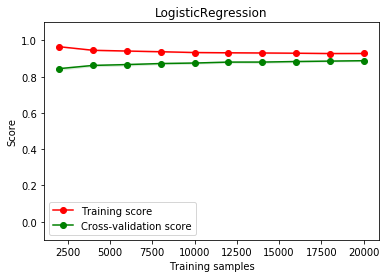

In [27]:
plot_curve(lr_tfidf, train_file, "LogisticRegression")

### Hyper-parameter Tuning

In [34]:
##### Penalty and C

penalty = ['l1', 'l2']
C = [np.logspace(0, 4, 10)]

hyperparameters1 = dict(C=C, penalty=penalty)
clf = GridSearchCV(lr_tfidf, hyperparameters1, cv=5, verbose=0) 
best_model = clf.fit(train_file, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [35]:
pred = best_model.predict(test_text_bow_10000feat)
predicted = pd.DataFrame()
predicted['id'] = test['id']
predicted['sentiment'] = pred
predicted.to_csv("hptuning1.csv", index=False)

#### Kaggle Public LB Score: 88.384

In [37]:
##### Penalty, C and tol

penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,2,3,4,5]
tol = [0.00001,0.0001,0.001,0.01,0.1]

hyperparameters2 = dict(C=C, penalty=penalty, tol=tol)
clf = GridSearchCV(lr_tfidf, hyperparameters2, cv=5, verbose=0) 
best_model2 = clf.fit(train_file, y)

# View best hyperparameters
print('Best Penalty:', best_model2.best_estimator_.get_params()['penalty'])
print('Best C:', best_model2.best_estimator_.get_params()['C'])
print('Best tol:', best_model2.best_estimator_.get_params()['tol'])

Best Penalty: l2
Best C: 2
Best tol: 0.1


In [38]:
pred = best_model2.predict(test_text_bow_10000feat)
predicted = pd.DataFrame()
predicted['id'] = test['id']
predicted['sentiment'] = pred
predicted.to_csv("hptuning2.csv", index=False)

#### Kaggle Public LB Score: 88.452

In [43]:
##### solver, C and tol

solver = ['newton-cg', 'lbfgs', 'sag']
C = [0.001,0.01,0.1,1,2,3,4,5]
tol = [0.00001,0.0001,0.001,0.01,0.1]

hyperparameters3 = dict(C=C, tol=tol, solver=solver)
clf = GridSearchCV(lr_tfidf, hyperparameters3, cv=5, verbose=0) 
best_model3 = clf.fit(train_file, y)

# View best hyperparameters

print('Best C:', best_model3.best_estimator_.get_params()['C'])
print('Best tol:', best_model3.best_estimator_.get_params()['tol'])
print('Best solver:', best_model3.best_estimator_.get_params()['solver'])

D:\Installation_File\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Installation_File\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Best C: 2
Best tol: 0.001
Best solver: sag


In [44]:
pred = best_model3.predict(test_text_bow_10000feat)
predicted = pd.DataFrame()
predicted['id'] = test['id']
predicted['sentiment'] = pred
predicted.to_csv("hptuning3.csv", index=False)

#### Kaggle Public LB Score: 88.464

In [60]:
logistic = LogisticRegression(C=2, tol= 0.001, solver= 'sag')
print(logistic)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.001,
          verbose=0, warm_start=False)
